# Reproducibility with original data (seqFISH)

This tutorial demonstrates how to pseudo-spatiotemporal analysis on seqFISH mouse embryo data using Pysodb and SpaceFlow.

A reference paper can be found at https://www.nature.com/articles/s41467-022-31739-w.

This tutorial refers to the following tutorial at https://github.com/hongleir/SpaceFlow/blob/master/tutorials/seqfish_mouse_embryogenesis.ipynb. At the same time, the way of loadding data is modified by using Pysodb.

## Import packages and set configurations

In [1]:
# Use the Python warnings module to filter and ignore any warnings that may occur in the program after this point.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import several python packages commonly used in data analysis and visualization.
# numpy (imported as np) is a package for numerical computing with arrays.
import numpy as np
# scanpy (imported as sc) is a package for single-cell RNA sequencing analysis.
import scanpy as sc
# matplotlib.pyplot (imported as plt) is a package for data visualization.
#import matplotlib.pyplot as plt

In [3]:
# from SpaceFlow package import SpaceFlow module
from SpaceFlow import SpaceFlow

In [4]:
# Imports a palettable package
import palettable
# Create three variables with lists of colors for categorical visualizations and biotechnology-related visualizations, respectively.
cmp_pspace = palettable.cartocolors.diverging.TealRose_7.mpl_colormap
cmp_domain = palettable.cartocolors.qualitative.Pastel_10.mpl_colors
cmp_ct = palettable.cartocolors.qualitative.Safe_10.mpl_colors

When encountering the error "No module name 'palettable'", users need to activate conda's virtual environment first at the terminal and run the following command in the terminal: "pip install palettable". This approach can be applied to other packages as well, by replacing 'palettable' with the name of the desired package.

## Streamline development of loading spatial data with Pysodb

In [5]:
# Import pysodb package
# Pysodb is a Python package that provides a set of tools for working with SODB databases. 
# SODB is a format used to store data in memory-mapped files for efficient access and querying. 
# This package allows users to interact with SODB files using Python.
import pysodb

In [6]:
# Initialize the sodb object
sodb = pysodb.SODB()

In [7]:
# Define names of the dataset_name and experiment_name
dataset_name = 'lohoff2021integration'
experiment_name = 'lohoff2020highly_seqFISH_mouse_Gastrulation'
# Load a specific experiment
# It takes two arguments: the name of the dataset and the name of the experiment to load.
# Two arguments are available at https://gene.ai.tencent.com/SpatialOmics/.
#%%time
adata = sodb.load_experiment(dataset_name,experiment_name)

load experiment[lohoff2020highly_seqFISH_mouse_Gastrulation] in dataset[lohoff2021integration]


In [8]:
# Filter out genes
sc.pp.filter_genes(adata, min_cells=3)

## Perform SpaceFlow for pseudo-spatiotemporal analysis

In [9]:
# Create SpaceFlow Object
#%%time
sf = SpaceFlow.SpaceFlow(
    count_matrix=adata.X, 
    spatial_locs=adata.obsm['spatial'], 
    sample_names=adata.obs_names, 
    gene_names=adata.var_names
)

When encountering the error "Error: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all().", in the "SpaceFlow.py" file from the SpaceFlow package, the user is advised to make the following modifications within the init function. Replace "elif count_matrix and spatial_locs:" with "elif count_matrix is not None and spatial_locs is not None:". Additionally, modify "if gene_names:" and "if sample_names:" to "if gene_names is not None:" and "if sample_names is not None:" respectively. The above modifications ensure that the if statement returns a single boolean value. respectively.

In [10]:
# Preprocess data
#%%time
sf.preprocessing_data(n_top_genes=3000)

When encountering the error "Error: You can drop duplicate edges by setting the 'duplicates' kwarg",in "SpaceFlow.py" from the SpaceFlow package, modify the preprocessing_data function by: (1) removing target_sum=1e4 from sc.pp.normalize_total(); (2) changing the flavor argument to 'seurat' in sc.pp.highly_variable_genes(); (3) Save and rerun the analysis.

When encountering the error "Error: module 'networkx' has no attribute 'to_scipy_sparse_matrix'", users should first activate the virtual environment at the terminal and then downgrade NetworkX with the following command："pip install networkx==2.8". This will ensure that the correct version of NetworkX is installed within the specified virtual environment.

In [11]:
# Train a deep graph network model
#%%time
sf.train(
    spatial_regularization_strength=0.1, 
    z_dim=50, 
    lr=1e-3, 
    epochs=1000, 
    max_patience=50, 
    min_stop=100, 
    random_seed=42, 
    gpu=0, 
    regularization_acceleration=True, 
    edge_subset_sz=1000000
)



Epoch 2/1000, Loss: 1.4433507919311523
Epoch 12/1000, Loss: 1.1957048177719116
Epoch 22/1000, Loss: 0.899651050567627
Epoch 32/1000, Loss: 0.5220355987548828
Epoch 42/1000, Loss: 0.25792792439460754
Epoch 52/1000, Loss: 0.15247754752635956
Epoch 62/1000, Loss: 0.11323283612728119
Epoch 72/1000, Loss: 0.09924617409706116
Epoch 82/1000, Loss: 0.08421587944030762
Epoch 92/1000, Loss: 0.08441664278507233
Epoch 102/1000, Loss: 0.07488397508859634
Epoch 112/1000, Loss: 0.07958334684371948
Epoch 122/1000, Loss: 0.07067480683326721
Epoch 132/1000, Loss: 0.07085031270980835
Epoch 142/1000, Loss: 0.06988634169101715
Epoch 152/1000, Loss: 0.06983151286840439
Epoch 162/1000, Loss: 0.07103468477725983
Epoch 172/1000, Loss: 0.06584274768829346
Epoch 182/1000, Loss: 0.06390106678009033
Epoch 192/1000, Loss: 0.06413406133651733
Epoch 202/1000, Loss: 0.06146261841058731
Epoch 212/1000, Loss: 0.06414571404457092
Epoch 222/1000, Loss: 0.06728968769311905
Epoch 232/1000, Loss: 0.0630531907081604
Epoch 242

array([[-0.5202136 , -0.17956705,  0.7582989 , ..., -0.1178573 ,
        -0.00734187,  2.4900703 ],
       [-0.46302137, -0.19299765,  1.0326352 , ..., -0.19934863,
        -0.06319354,  2.3966684 ],
       [-0.5225591 ,  0.6163565 ,  0.13151401, ..., -0.03753699,
        -0.00742718,  2.095408  ],
       ...,
       [-0.23238094,  0.99448997, -0.00804079, ..., -0.03581214,
         0.579624  ,  1.5177417 ],
       [-0.32503372, -0.07396829,  1.0361072 , ..., -0.13758945,
         0.98967546,  2.352452  ],
       [-0.21778385,  0.82494813,  0.03623015, ..., -0.06693349,
         0.8934428 ,  1.5172613 ]], dtype=float32)

In [12]:
# Idenfify the spatiotemporal patterns through pseudo-Spatiotemporal Map (pSM)
sf.pseudo_Spatiotemporal_Map(pSM_values_save_filepath="./pSM_values.tsv", n_neighbors=20, resolution=1.0)

Performing pseudo-Spatiotemporal Map
pseudo-Spatiotemporal Map(pSM) calculation complete, pSM values of cells or spots saved at ./pSM_values.tsv!


In [13]:
# Create a new column called 'pspace' from pSM values of cells or spots.
adata.obs['pspace'] = sf.pSM_values

(-2.802851333716996,
 2.7737768053548297,
 -3.8412926523589537,
 3.841292652358961)

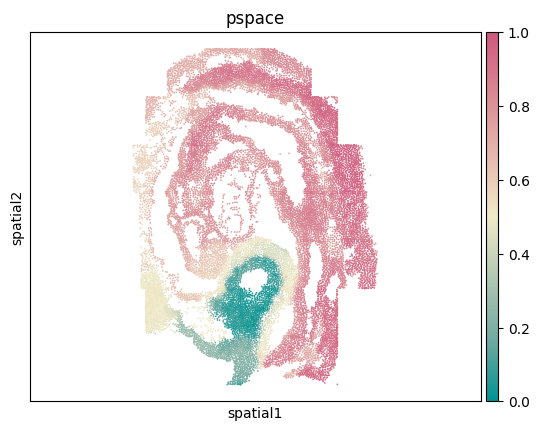

In [14]:
# Visualize spatial coordinates in a scatterplot colored by 'pspace'
ax = sc.pl.embedding(adata,basis='spatial',color='pspace',show=False,color_map=cmp_pspace)
ax.axis('equal')
#plt.savefig('figures/seqFISH_pspace.png',bbox_inches='tight',transparent=True,dpi=400)
#plt.savefig('figures/seqFISH_pspace.pdf',bbox_inches='tight',transparent=True,dpi=400)

(-2.802851333716996,
 2.7737768053548297,
 -3.8412926523589537,
 3.841292652358961)

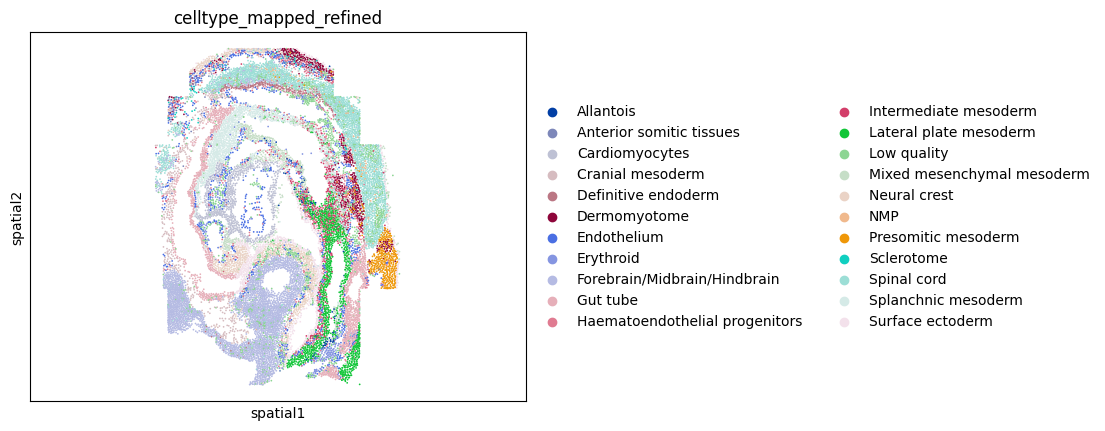

In [15]:
# Visualize spatial coordinates in a scatterplot colored by 'celltype_mapped_refined'
ax = sc.pl.embedding(adata,basis='spatial',color='celltype_mapped_refined',show=False)
ax.axis('equal')
#plt.savefig('figures/seqFISH_ct.png',bbox_inches='tight',transparent=True,dpi=400)
#plt.savefig('figures/seqFISH_ct.pdf',bbox_inches='tight',transparent=True,dpi=400)